<a href="https://colab.research.google.com/github/bavilaa/nlp_got/blob/master/imdb_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Y,si             , _ ,
#                ( o o )
#               /'` ' `'\
#        ,      |'''''''|
#               |\\'''//|
#                  """
#BAA

In [0]:
#Activating Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
from imdb import IMDb
import pandas as pd
ia = IMDb()

In [0]:
#loading data from Game of Thrones

series = ia.get_movie('0944947')

In [6]:
#loading information about seasons and episodes
ia.update(series, 'episodes')
print(sorted(series['episodes'].keys()))

[1, 2, 3, 4, 5, 6, 7, 8]


In [0]:
#tests
episode1 = series['episodes'][1][1]




In [0]:
seasons = sorted(series['episodes'].keys())


#empty list 
got_db = []



for s in seasons:
    
    #episodes by seasons:
    episodes =  series['episodes'][s]
    for e in episodes:
        episode_o = series['episodes'][s][e]
        #print (episode_o['title'] + " rating: " + str(episode_o['rating']))
        
        #storing the season, episode, titles, rating into a list 
        got_db.append ([ s , e , episode_o['title'] , episode_o['rating']])
        

In [0]:
# Creating a dataframe from the previously list:
df = pd.DataFrame(got_db)

#renaiming the columns:

df.rename(columns = {0:'Season', 1:'Episode', 
                              2:'Title' , 3:'Rating'}, inplace = True) 



In [0]:
#Sorting
df.sort_values(['Season' , 'Episode'])
#reseting the index
df = df.reset_index()


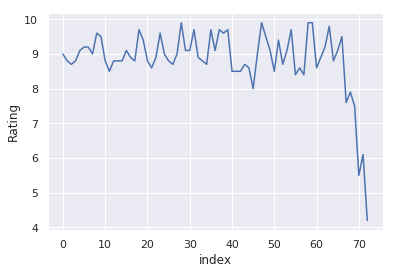

In [11]:
#plotting the index vs rating
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.lineplot(x="index", y="Rating",
legend="full", data=df);

In [12]:
df

,index,Season,Episode,Title,Rating
0,0,1,1,Winter Is Coming,9.001235
1,1,1,2,The Kingsroad,8.801235
2,2,1,3,Lord Snow,8.701235
3,3,1,4,"Cripples, Bastards, and Broken Things",8.801235
4,4,1,5,The Wolf and the Lion,9.101235
5,5,1,6,A Golden Crown,9.201235
6,6,1,7,You Win or You Die,9.201235
7,7,1,8,The Pointy End,9.001235
8,8,1,9,Baelor,9.601235
9,9,1,10,Fire and Blood,9.501235


In [0]:
#Saving to a csv

df[["Season", "Episode"]] = df[["Season", "Episode"]].apply(pd.to_numeric)

route = '/content/drive/My Drive/Colab Notebooks/Project_NLP/'
bd_name = 'rating_bd.csv'

df.to_csv(route + bd_name)